 # Task 1: Student Score Prediction
 Description:
 * Dataset (Recommended): Student Performance Factors (Kaggle
 * Build a model to predict students' exam scores based on their study hour
 * Perform data cleaning and basic visualization to understand the datase
 * Split the dataset into training and testing set
 * Train a linear regression model to estimate final score
 * Visualize predictions and evaluate model performance
 # Tools & Libraries:
 1. Python
 2. Pandas
 # Covered Topics
 * Matplotlib
 * Regression |  Evaluation metrics
 * Scikit-learn
 # Bonus:
 * Try polynomial regression and compare performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Libraries Description 
Why we are using these Libraries:
* ****import pandas as pd****: For data manipulation and analysis using DataFrames
* ****import numpy as np****: For numerical computations and array operations
* ****import matplotlib.pyplot as plt****: For creating static data visualizations and plots
* ****import seaborn as sns****: For enhanced statistical data visualizations
* ****from sklearn.model_selection import train_test_split****: For splitting datasets into training and testing sets
* ****from sklearn.linear_model import LinearRegression****: For implementing linear regression models
* ****from sklearn.preprocessing import PolynomialFeatures****: For generating polynomial features for regression
* ****from sklearn.compose import ColumnTransformer****: Enabling efficient handling of numerical and categorical features together.
* ****from sklearn.pipeline import make_pipeline****: For building ML pipelines combining preprocessing and modeling steps
* ****from sklearn.metrics import mean_squared_error, r2_score****: For evaluating regression model performance


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Load and clean the dataset
def load_and_clean_data(file_path='/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv'):
    # Load dataset using pandas
    df = pd.read_csv(file_path)
    
   
    df = df.dropna()  
   
    df = df[(df['Hours_Studied'] >= 0) & (df['Exam_Score'] >= 0)]  
    df = df[df['Exam_Score'] <= 100]  
    df = df[(df['Attendance'] >= 0) & (df['Attendance'] <= 100)] 
    df = df[df['Sleep_Hours'] >= 0]  
    df = df[df['Previous_Scores'] >= 0]  
    df = df[df['Tutoring_Sessions'] >= 0]  
    
    return df

# Load and clean dataset
df = load_and_clean_data()

# Show first few rows to confirm dataset is loaded and cleaned
print("✅ Dataset loaded successfully. Here are the first 5 rows:")
print(df.head())

# Check dataset shape
print(f"\nDataset shape: {df.shape}")


✅ Dataset loaded successfully. Here are the first 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_

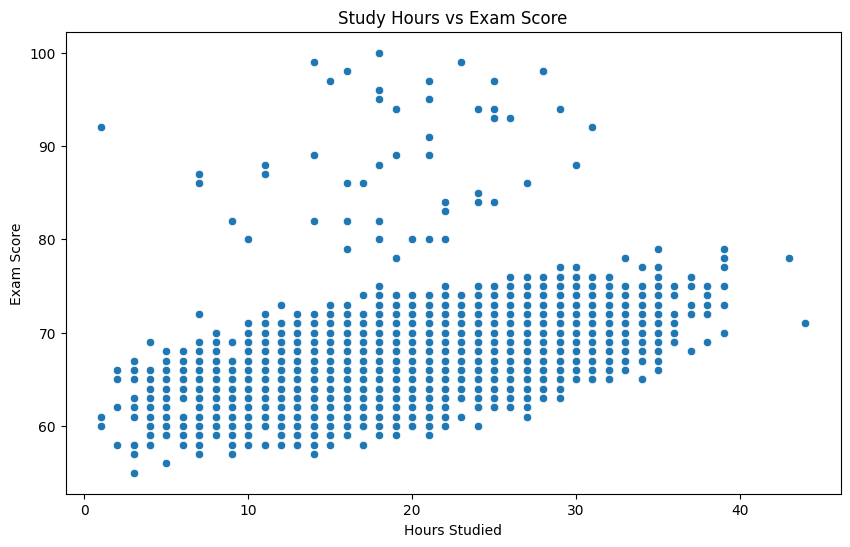

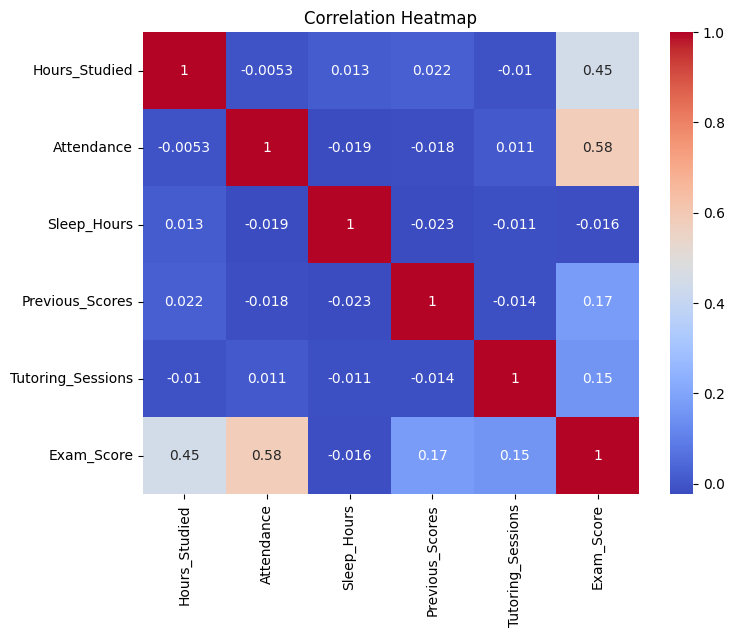

In [12]:
# 2. Data visualization
def visualize_data(df):
    # Scatter plot: Hours Studied vs Exam Score
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
    plt.title('Study Hours vs Exam Score')
    plt.xlabel('Hours Studied')
    plt.ylabel('Exam Score')
   
    plt.savefig('scatter_plot_hours.png')
    plt.show()
    plt.close()
    
    # Correlation heatmap for numerical columns
    numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
      
    plt.savefig('correlation_heatmap.png')
    plt.show()
    plt.close()
    
visualize_data(df)


# Load and Clean Data:
Purpose: Load dataset and clean by removing missing/negative values, capping Exam_Score at 100, Attendance at 0-100.
Visualizations:
* numerical_distributions_before_cleaning.png: Histograms of numerical features (Hours_Studied, Attendance,Sleep_Hours, Previous_Scores, Tutoring_Sessions, Exam_Score) to check distributions pre-cleaning.
* categorical_distributions.png: Count plots for categorical features (Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access) to assess category balance.
* numerical_distributions_after_cleaning.png: Histograms post-cleaning to confirm removal of invalid values.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


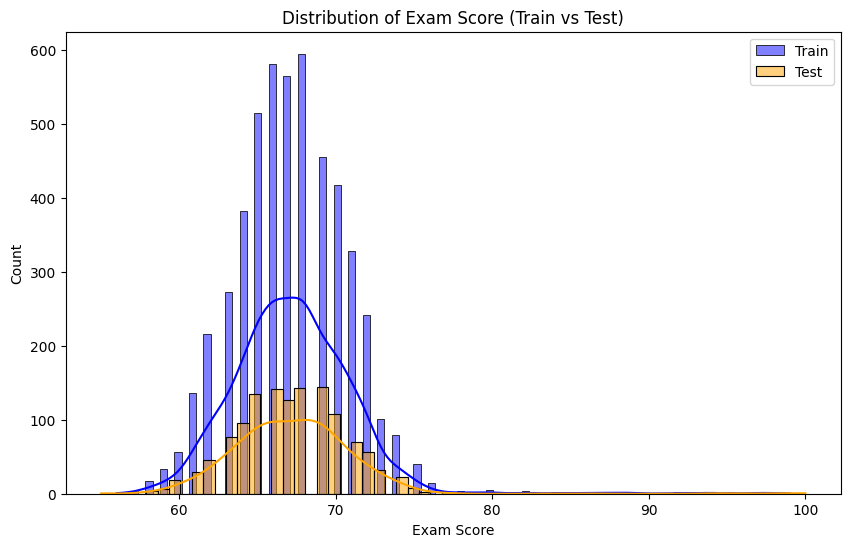

In [10]:
# 3. Prepare data for modeling
def prepare_data(df):
    # Define features and target
    numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']
    categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access']
    
    # Create feature matrix X and target vector y
    X = df[numerical_features + categorical_features]
    y = df['Exam_Score']
    
    # Create preprocessor for categorical and numerical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),  # Numerical features remain unchanged
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)  # Encode categorical features
        ])
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # Visualize target variable distribution in train and test sets
    plt.figure(figsize=(10, 6))
    sns.histplot(y_train, kde=True, color='blue', label='Train', alpha=0.5)
    sns.histplot(y_test, kde=True, color='orange', label='Test', alpha=0.5)
    plt.title('Distribution of Exam Score (Train vs Test)')
    plt.xlabel('Exam Score')
    plt.legend()
     
    plt.savefig('exam_score_train_test_distribution.png')
    plt.show()
    plt.close()
    
    return X_train, X_test, y_train, y_test, preprocessor

# Call the function and store outputs
X_train, X_test, y_train, y_test, preprocessor = prepare_data(df)


# The prepare_data function prepares the dataset for modeling by:

**Defining features and target:**

* Selects numerical features: study hours, attendance, sleep hours, previous scores, tutoring sessions
* Selects categorical features: parental involvement, access to resources, extracurricular activities, motivation level, internet access
* Defines the target as 'Exam_Score'

**Creating a preprocessor:**

* Uses ColumnTransformer to pass numerical features unchanged and encode categorical features with OneHotEncoding (dropping the first category to avoid dummy variable trap).

**Splitting the data:**

* Splits the dataset into training (80%) and testing (20%) sets for model evaluation.

**Visualizing the target variable distribution:**

* Plots the distribution of exam scores in training and testing sets to check data consistency and distribution balance.

**Returns:**

* X_train, X_test, y_train, y_test, and the preprocessor for downstream modeling.

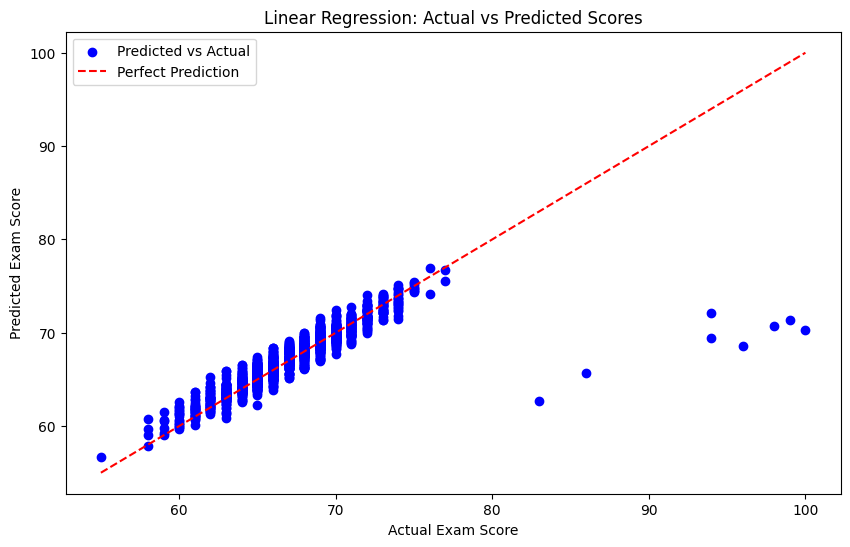

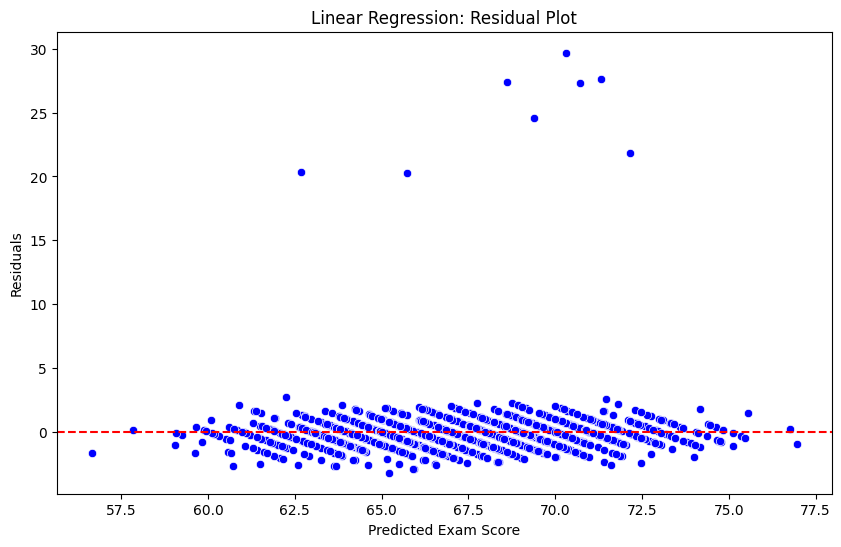

MSE: 4.87, R2 Score: 0.69


In [9]:
# 4. Train and evaluate linear regression model
def train_linear_model(X_train, X_test, y_train, y_test, preprocessor):
    
    model = make_pipeline(preprocessor, LinearRegression())
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Visualize predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    plt.title('Linear Regression: Actual vs Predicted Scores')
    plt.xlabel('Actual Exam Score')
    plt.ylabel('Predicted Exam Score')
    plt.legend()
    
    plt.savefig('linear_regression_results.png')
    plt.show() 
    plt.close()
    
    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Linear Regression: Residual Plot')
    plt.xlabel('Predicted Exam Score')
    plt.ylabel('Residuals')
   
    plt.savefig('linear_regression_residuals.png')
    plt.show()  
    plt.close()
    
    return model, mse, r2

model, mse, r2 = train_linear_model(X_train, X_test, y_train, y_test, preprocessor)
print(f"MSE: {mse:.2f}, R2 Score: {r2:.2f}")


# The train_linear_model function trains and evaluates a linear regression model by:

**Building a pipeline:**

* Combines the preprocessor (for encoding and scaling features) with a Linear Regression model using make_pipeline.

**Training the model:**

* Fits the pipeline on the training data (X_train, y_train) to learn the relationship between features and exam scores.

**Making predictions:**

* Uses the trained model to predict exam scores on the test set (X_test).

**Evaluating performance:**

* Calculates Mean Squared Error (MSE) to measure prediction error.

* Calculates R² Score to measure how well the model explains variance in exam scores.

**Visualizing results:**

Scatter plot: Shows predicted vs actual exam scores with a reference perfect prediction line to assess accuracy visually.

* Residual plot: Displays residuals (differences between actual and predicted scores) to check model assumptions and errors distribution.

**Returns:**

* The trained model, mse, and r2 for further analysis and reporting.



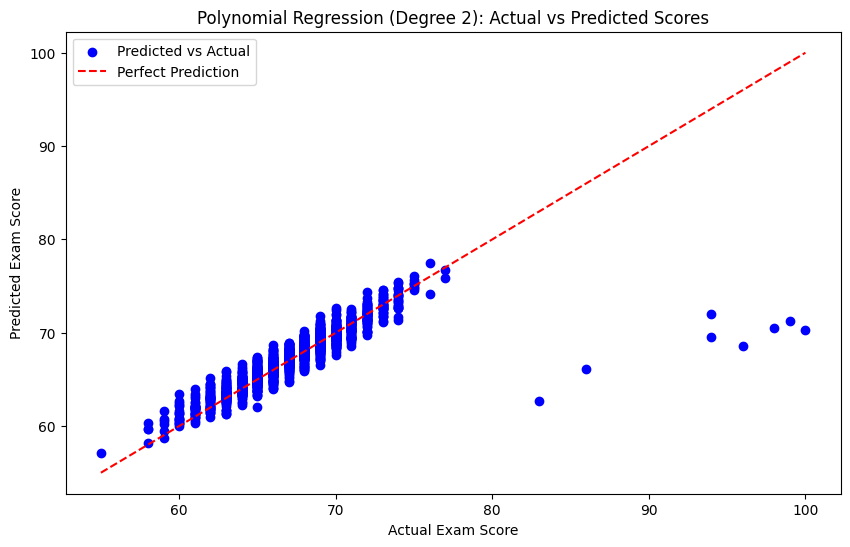

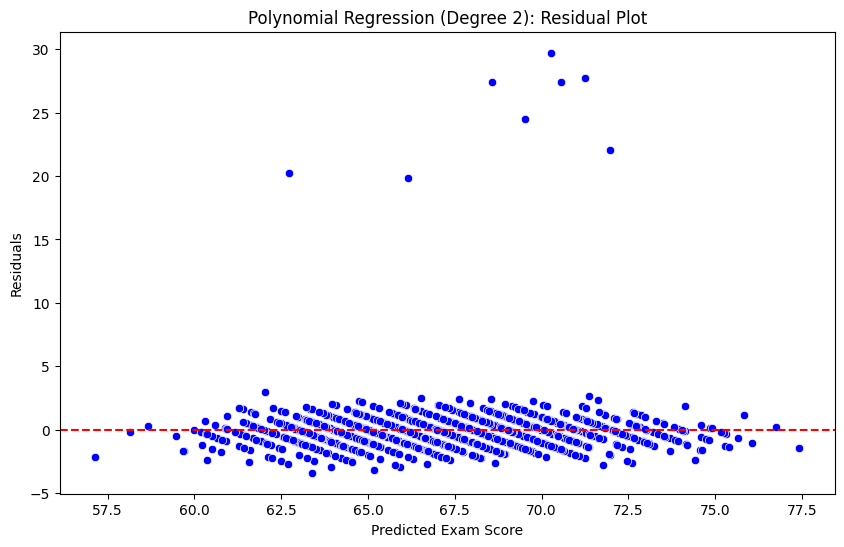

Polynomial Regression (Degree 2) MSE: 4.95, R2 Score: 0.68


In [8]:
# 5. Train and evaluate polynomial regression model
def train_polynomial_model(X_train, X_test, y_train, y_test, preprocessor, degree=2):
    
    polyreg = make_pipeline(
        preprocessor,
        PolynomialFeatures(degree),
        LinearRegression()
    )
    
    polyreg.fit(X_train, y_train)
    
    
    y_pred = polyreg.predict(X_test)
    
  
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
   
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    plt.title(f'Polynomial Regression (Degree {degree}): Actual vs Predicted Scores')
    plt.xlabel('Actual Exam Score')
    plt.ylabel('Predicted Exam Score')
    plt.legend()
  
    plt.savefig('polynomial_regression_results.png')
    plt.show()  
    plt.close()
    
   
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Polynomial Regression (Degree {degree}): Residual Plot')
    plt.xlabel('Predicted Exam Score')
    plt.ylabel('Residuals')
     
    plt.savefig('polynomial_regression_residuals.png')
    plt.show() 
    plt.close()
    
    return polyreg, mse, r2

poly_model, poly_mse, poly_r2 = train_polynomial_model(X_train, X_test, y_train, y_test, preprocessor, degree=2)
print(f"Polynomial Regression (Degree 2) MSE: {poly_mse:.2f}, R2 Score: {poly_r2:.2f}")


# The train_polynomial_model function trains and evaluates a polynomial regression model by:

**Building a pipeline:**

* Combines the preprocessor (for encoding and scaling features), PolynomialFeatures (to generate polynomial and interaction terms up to the specified degree), and a Linear Regression model using make_pipeline.

**Training the model:**

* Fits the pipeline on training data (X_train, y_train) to learn non-linear relationships between features and exam scores.

**Making predictions:**

* Uses the trained model to predict exam scores on the test set (X_test).

**Evaluating performance:**

* Calculates Mean Squared Error (MSE) to measure prediction error.

* Calculates R² Score to assess how well the model explains variance in exam scores.

**Visualizing results:**

* Scatter plot: Shows predicted vs actual exam scores with a reference perfect prediction line to visually assess model accuracy.

* Residual plot: Displays residuals (differences between actual and predicted scores) to analyze model fit and detect patterns in errors.

**Returns:**

* The trained polyreg model, along with its mse and r2 scores, for performance comparison and further analysis.

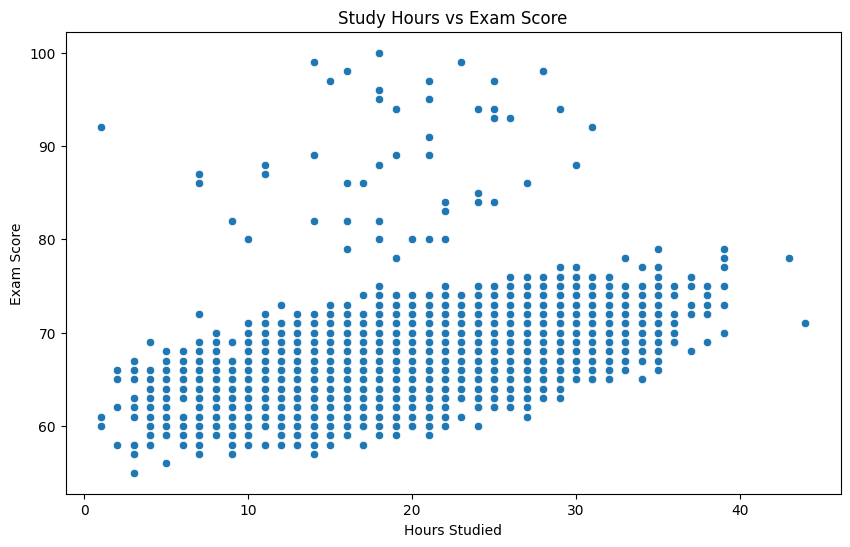

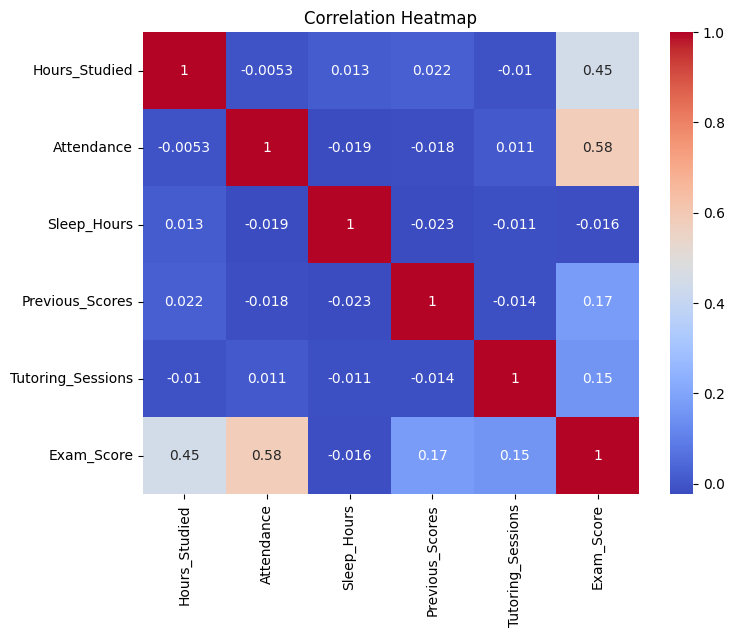

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


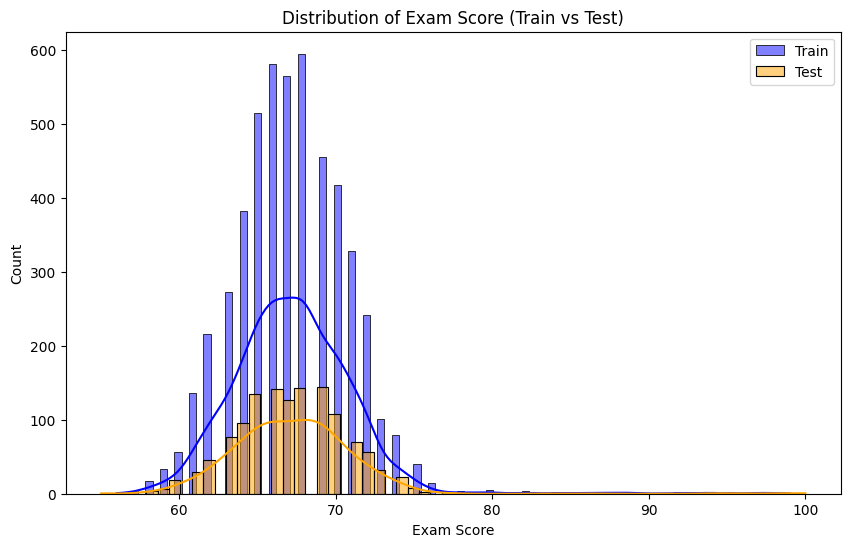

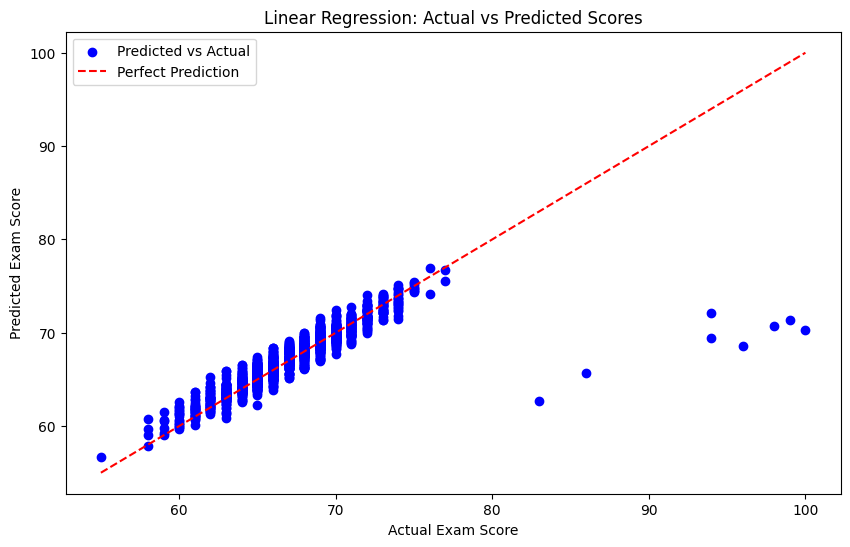

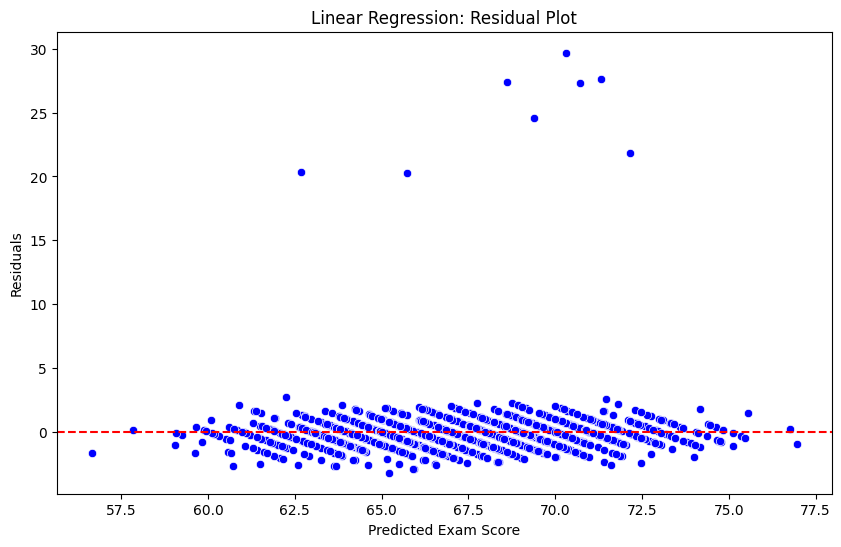

Linear Regression Results:
Mean Squared Error: 4.87
R² Score: 0.69


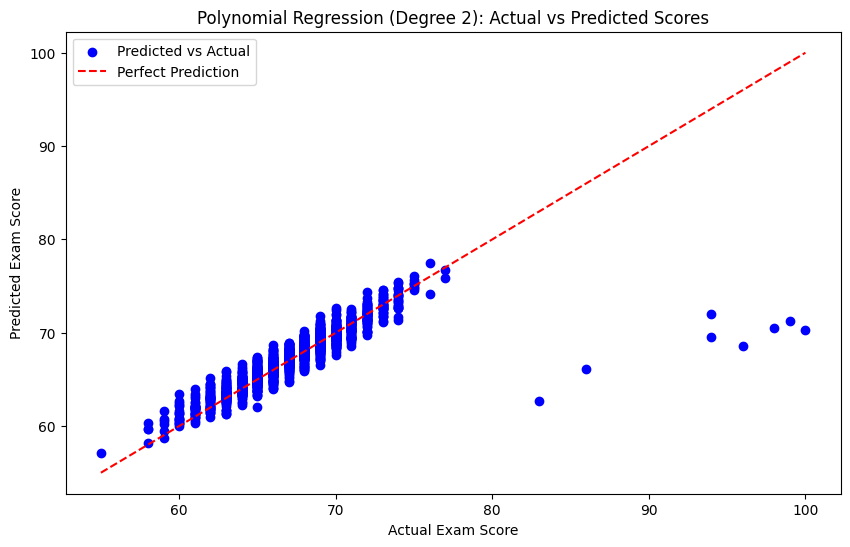

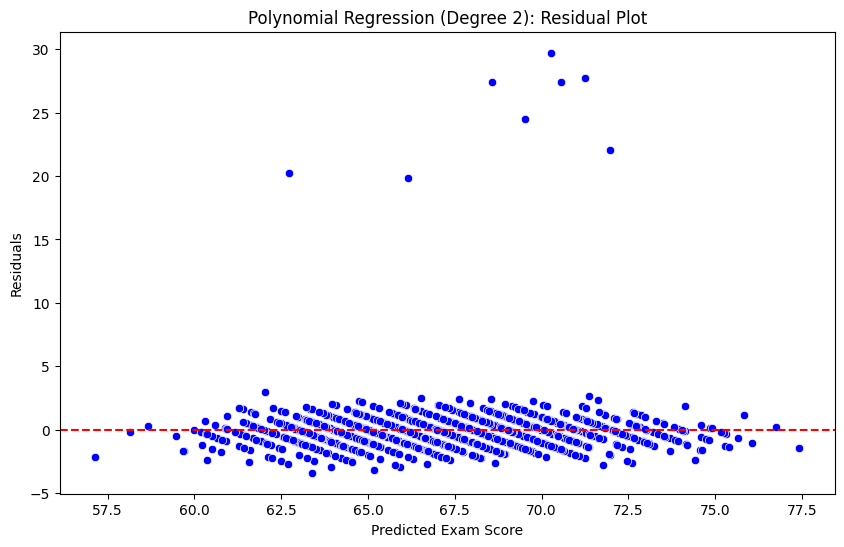


Polynomial Regression (Degree 2) Results:
Mean Squared Error: 4.95
R² Score: 0.68


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


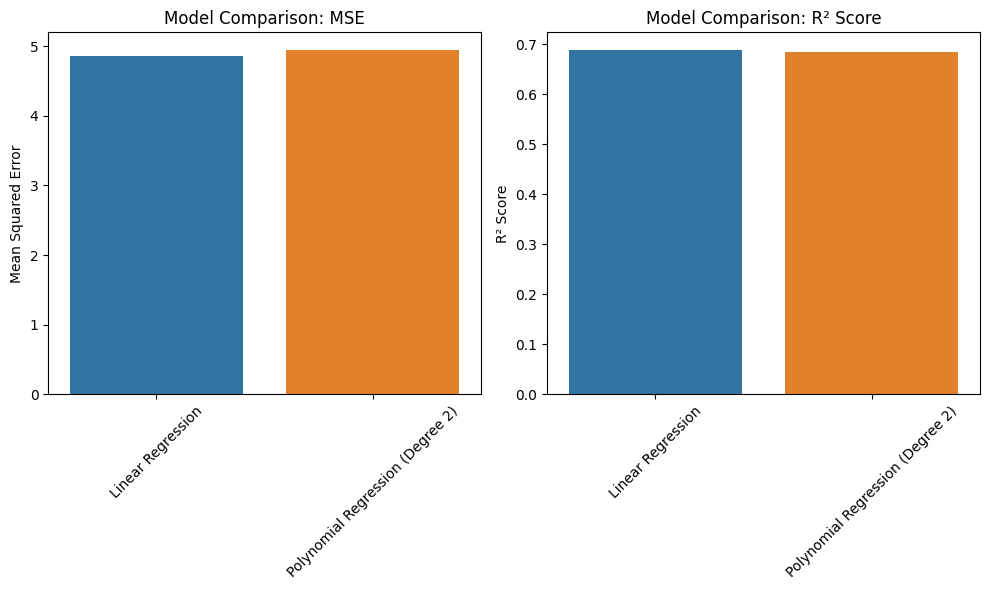

In [7]:
# Main execution
def main():
   
    df = load_and_clean_data()
    
    
    visualize_data(df)
    
    
    X_train, X_test, y_train, y_test, preprocessor = prepare_data(df)
    
    # Train and evaluate linear regression
    linear_model, linear_mse, linear_r2 = train_linear_model(X_train, X_test, y_train, y_test, preprocessor)
    print(f"Linear Regression Results:")
    print(f"Mean Squared Error: {linear_mse:.2f}")
    print(f"R² Score: {linear_r2:.2f}")
    
    # Train and evaluate polynomial regression
    poly_model, poly_mse, poly_r2 = train_polynomial_model(X_train, X_test, y_train, y_test, preprocessor, degree=2)
    print(f"\nPolynomial Regression (Degree 2) Results:")
    print(f"Mean Squared Error: {poly_mse:.2f}")
    print(f"R² Score: {poly_r2:.2f}")
    
    # Visualize model comparison
    plt.figure(figsize=(10, 6))
    models = ['Linear Regression', 'Polynomial Regression (Degree 2)']
    mse_values = [linear_mse, poly_mse]
    r2_values = [linear_r2, poly_r2]
    
    plt.subplot(1, 2, 1)
    sns.barplot(x=models, y=mse_values, palette=['#1f77b4', '#ff7f0e'])
    plt.title('Model Comparison: MSE')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=models, y=r2_values, palette=['#1f77b4', '#ff7f0e'])
    plt.title('Model Comparison: R² Score')
    plt.ylabel('R² Score')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()
    plt.close()


if __name__ == "__main__":
    main()

# The main function executes the entire pipeline for predicting student exam scores by:

**Loading and cleaning the dataset:**

* Calls load_and_clean_data() to import and preprocess data, handling missing values and outliers.

**Visualizing data:**

* Calls visualize_data(df) to generate scatter plots and correlation heatmaps for exploratory data analysis.

**Preparing data for modeling:**

* Splits data into training and testing sets with prepare_data(df) and applies encoding to categorical features.

**Training and evaluating models:**

* Linear Regression: Trains using train_linear_model, prints its Mean Squared Error (MSE) and R² Score.

* Polynomial Regression: Trains using train_polynomial_model (degree=2), prints its MSE and R² Score.

**Visualizing model comparison:**

* Creates side-by-side bar plots to compare MSE and R² Score for Linear Regression vs Polynomial Regression models, saved as model_comparison.png.

**Execution block:**

* Uses if __name__ == "__main__": main() to ensure the function runs only when the script is executed directly.